In [5]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

Source Name: TNJ0121+1320


Set OBSGEO-B to    19.822853 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Changed DATE-OBS from '11/09/97' to '1997-09-11''. [astropy.wcs.wcs]


SCUBA
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 20.4275  13.3494444444445  
CRPIX : 669.0  495.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00055555555555555  0.000555555555555552  
NAXIS : 1147  1047

R:
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---ARC'  'DEC--ARC'  
CRVAL : 20.4357091371  13.3532429963  
CRPIX : 117.5  119.5  
NAXIS : 234  238

K:
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 20.4354991913  13.3495836258  
CRPIX : 14.08100033  173.7059937  
NAXIS : 325  325



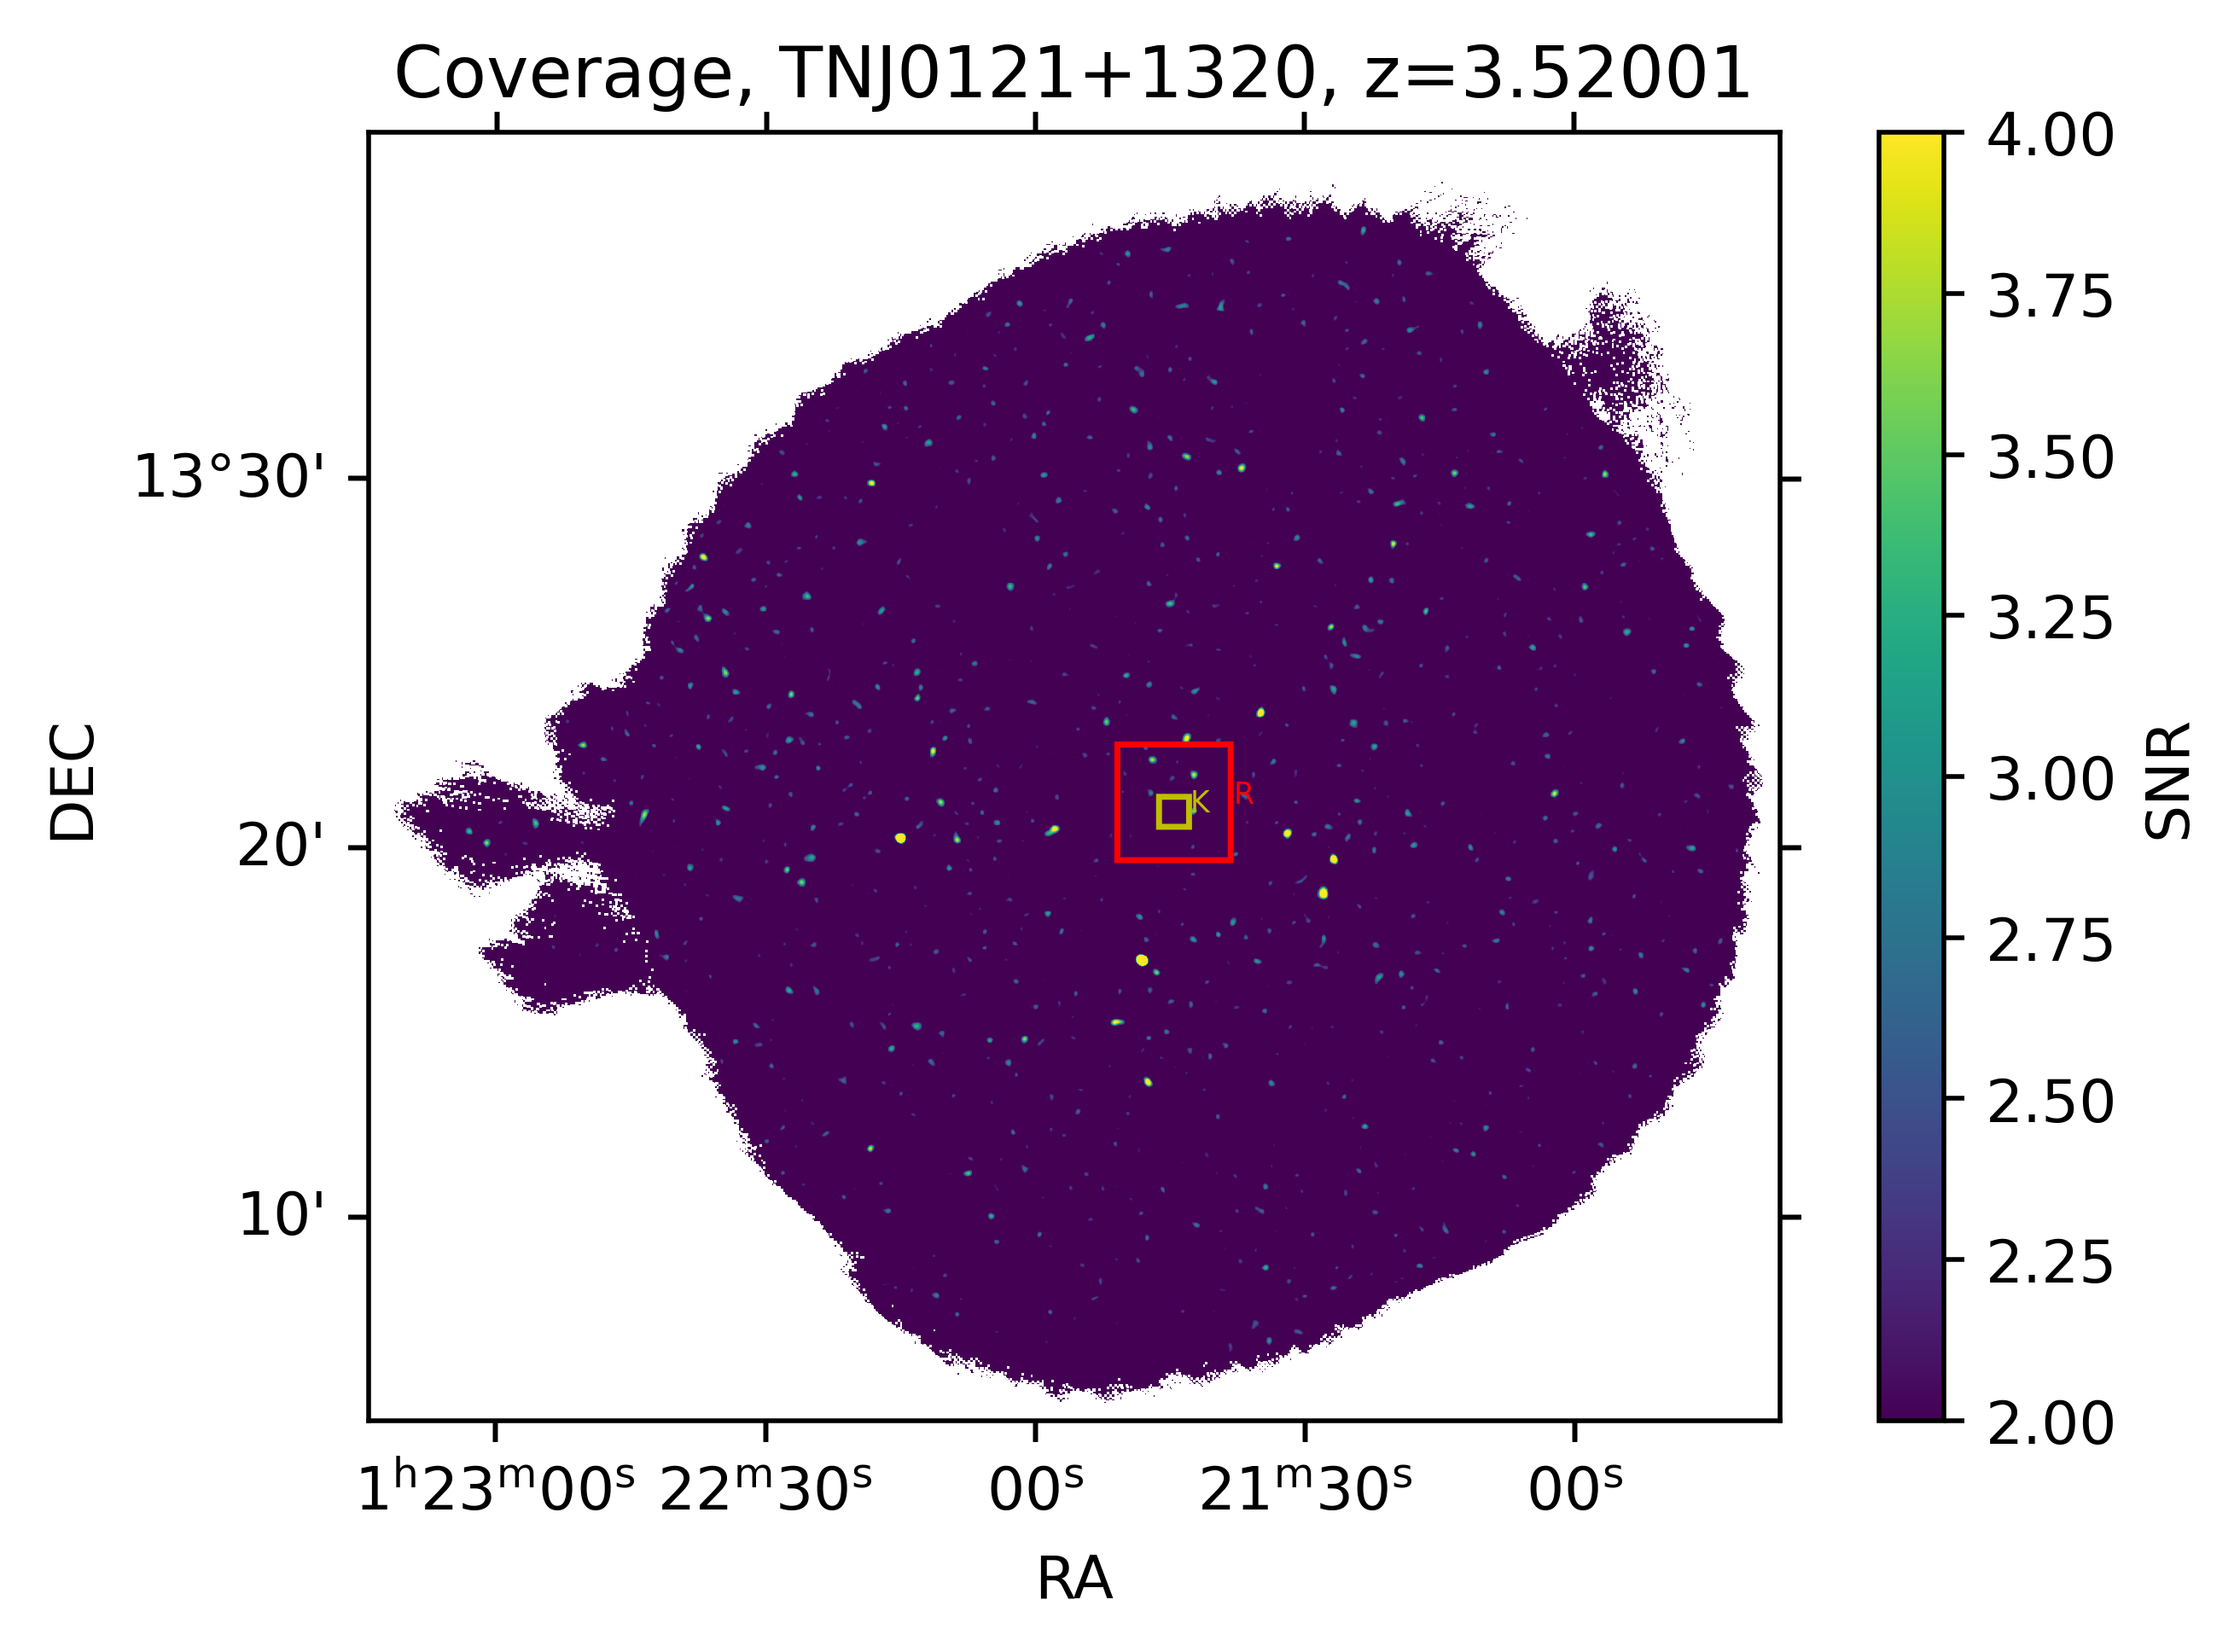

In [197]:
spath=r'C:\Users\blue\Desktop\Python\Figure_save'

names=['USS0943-242','USS1558-003','TNJ1338-1942','TNJ0205+2242','TNJ0121+1320','MG2144+1928','LBDS53W091',
      '8C1435+635','4C41','3C257','B20902+34','USS0828+193']
#MG2144+1928 is also called MGJ214405+1929
#4C41 is also called 4C41.17
#LBDS53W091 seem to have no optical data
zs=[2.923,2.527,4.11,3.5061,3.52001,3.594,1.552,4.261,3.792,2.474,3.382,2.572]

#num=7#use this to change objects

Name = input("Source Name: ") #names[num]
z_obj = zs[names.index(Name)]#REMEMBER TO CHANGE AFTER EACH OBJECT
nameSignal=Name+'_850_cal.fits'
namemfsignal =Name+'_850_mfcal.fits'
namemfSNR =Name+'_850_mfcal_snr.fits'
path=r'C:\Users\blue\Desktop\Python\reduced_'+Name+'\mosaic'

hdul = fits.open(os.path.join(path,namemfSNR))
SNR = hdul[0].data


#plot SCUBA map
wcs = WCS(hdul[0].header).dropaxis(2)
print('SCUBA')
print(wcs)
print('')
fig=plt.figure(dpi=500)
ax=fig.add_subplot(projection=wcs)
plt.imshow(SNR[0,:,:],vmin=2.,vmax=4., origin='lower')
clb = plt.colorbar()
clb.set_label('SNR')

#plot coverage squares for all bands
band=['R','J','J2','Jt','H','H2','Ht','K']
bandcolor=['r','m','m','m','k','k','k','y']
SNRVIS = [0]*len(band)

for i in range(0,len(band)):
    nameSignal=Name+band[i]+'.fits'
    if Name == '4C41':
        nameSignal=Name+'.17'+band[i]+'.fits'

    pathVIS=r'C:\Users\blue\Desktop\Python\Optical'
    if os.path.isfile(os.path.join(pathVIS,nameSignal))==True:
        hdulVIS = fits.open(os.path.join(pathVIS,nameSignal))
        wcsVIS = WCS(hdulVIS[0].header)
        print(band[i]+':')
        print(wcsVIS)
        print('')
        SNRVIS[i] = hdulVIS[0].data
        sqrstart=(hdulVIS[0].header['CRPIX1']-(hdulVIS[0].header['NAXIS1']/2),hdulVIS[0].header['CRPIX2']-(hdulVIS[0].header['NAXIS1']/2))
        sqr = plt.Rectangle(sqrstart, hdulVIS[0].header['NAXIS1'], hdulVIS[0].header['NAXIS2'], 
                            transform=ax.get_transform(wcsVIS),color=bandcolor[i],fill=False)
        ax.add_patch(sqr)
        ax.text(hdulVIS[0].header['CRPIX1']+(hdulVIS[0].header['NAXIS1']/1.9),hdulVIS[0].header['CRPIX2'],
                band[i], transform=ax.get_transform(wcsVIS),color=bandcolor[i], fontsize=5)

#plt.plot(hdul[0].header['CRPIX1'],hdul[0].header['CRPIX2'],'o')
plt.title('Coverage, '+Name+', '+'z='+str(z_obj))
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.savefig(os.path.join(spath,'SNR_map_Full_'+Name+'.png'),dpi=500)